# Clustering Analysis 

## Objective:
The objective of this assignment is to introduce to various clustering algorithms, including K-Means, hierarchical, and DBSCAN, and provide hands-on experience in applying these techniques to a real-world dataset.

## Datasets :
## Data Preprocessing:

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

In [2]:
## dataset
df = pd.read_excel("EastWestAirlines.xlsx", sheet_name=1)
df = df.drop(columns=['ID#'], errors='ignore')

# Handling missing values for numeric columns
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [3]:
# Removing outliers using Z-score threshold 3
df = df[(np.abs(zscore(df[numeric_cols])) < 3).all(axis=1)]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[numeric_cols])


### Exploratory Data Analysis (EDA)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3630.000000,3630.000000,3630.000000,3630.0,3630.0,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000
mean,60519.392562,39.584573,1.997245,1.0,1.0,14299.180716,10.464187,255.907438,0.785124,4061.804408,0.340220
std,61882.862343,249.199005,1.319875,0.0,0.0,18134.266531,8.251370,636.954758,1.818614,2052.901389,0.473848
min,0.000000,0.000000,1.000000,1.0,1.0,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,17481.000000,0.000000,1.000000,1.0,1.0,1000.000000,3.000000,0.000000,0.000000,2284.000000,0.000000
50%,39220.000000,0.000000,1.000000,1.0,1.0,5894.500000,11.000000,0.000000,0.000000,4022.000000,0.000000
75%,82121.500000,0.000000,3.000000,1.0,1.0,21631.250000,16.000000,150.000000,1.000000,5715.750000,1.000000
max,370941.000000,2454.000000,5.000000,1.0,1.0,89360.000000,39.000000,4652.000000,12.000000,8296.000000,1.000000


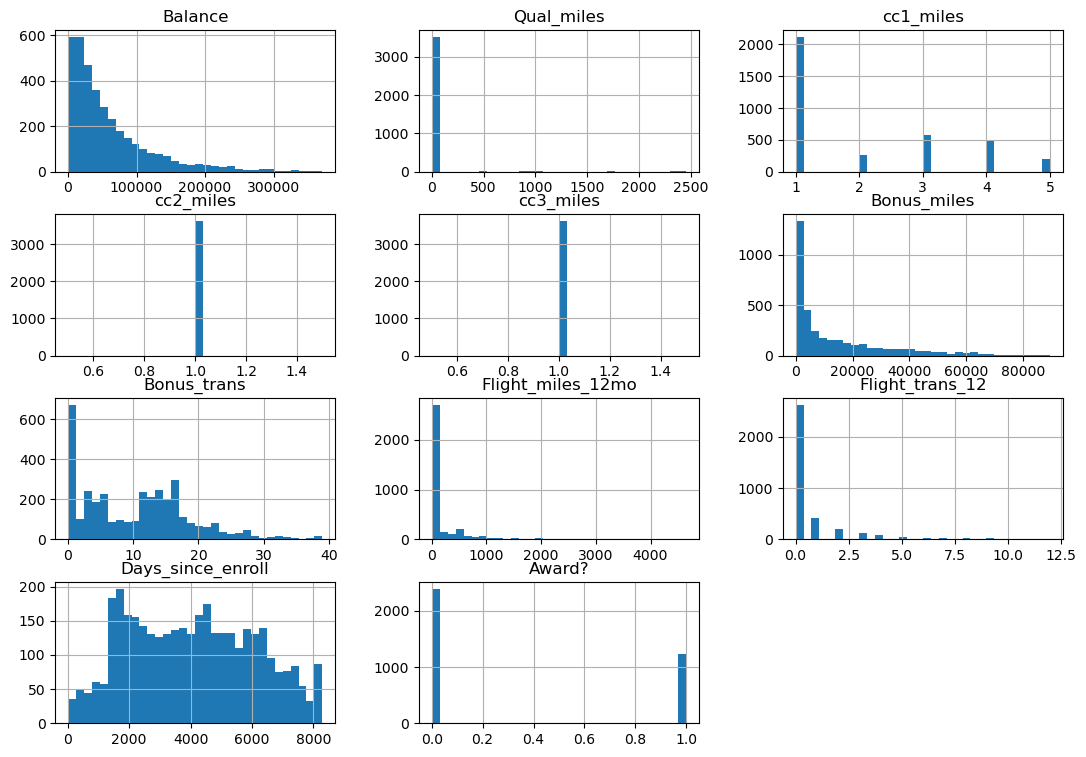

In [6]:
df[numeric_cols].hist(bins=32, figsize=(13, 9))
plt.show()


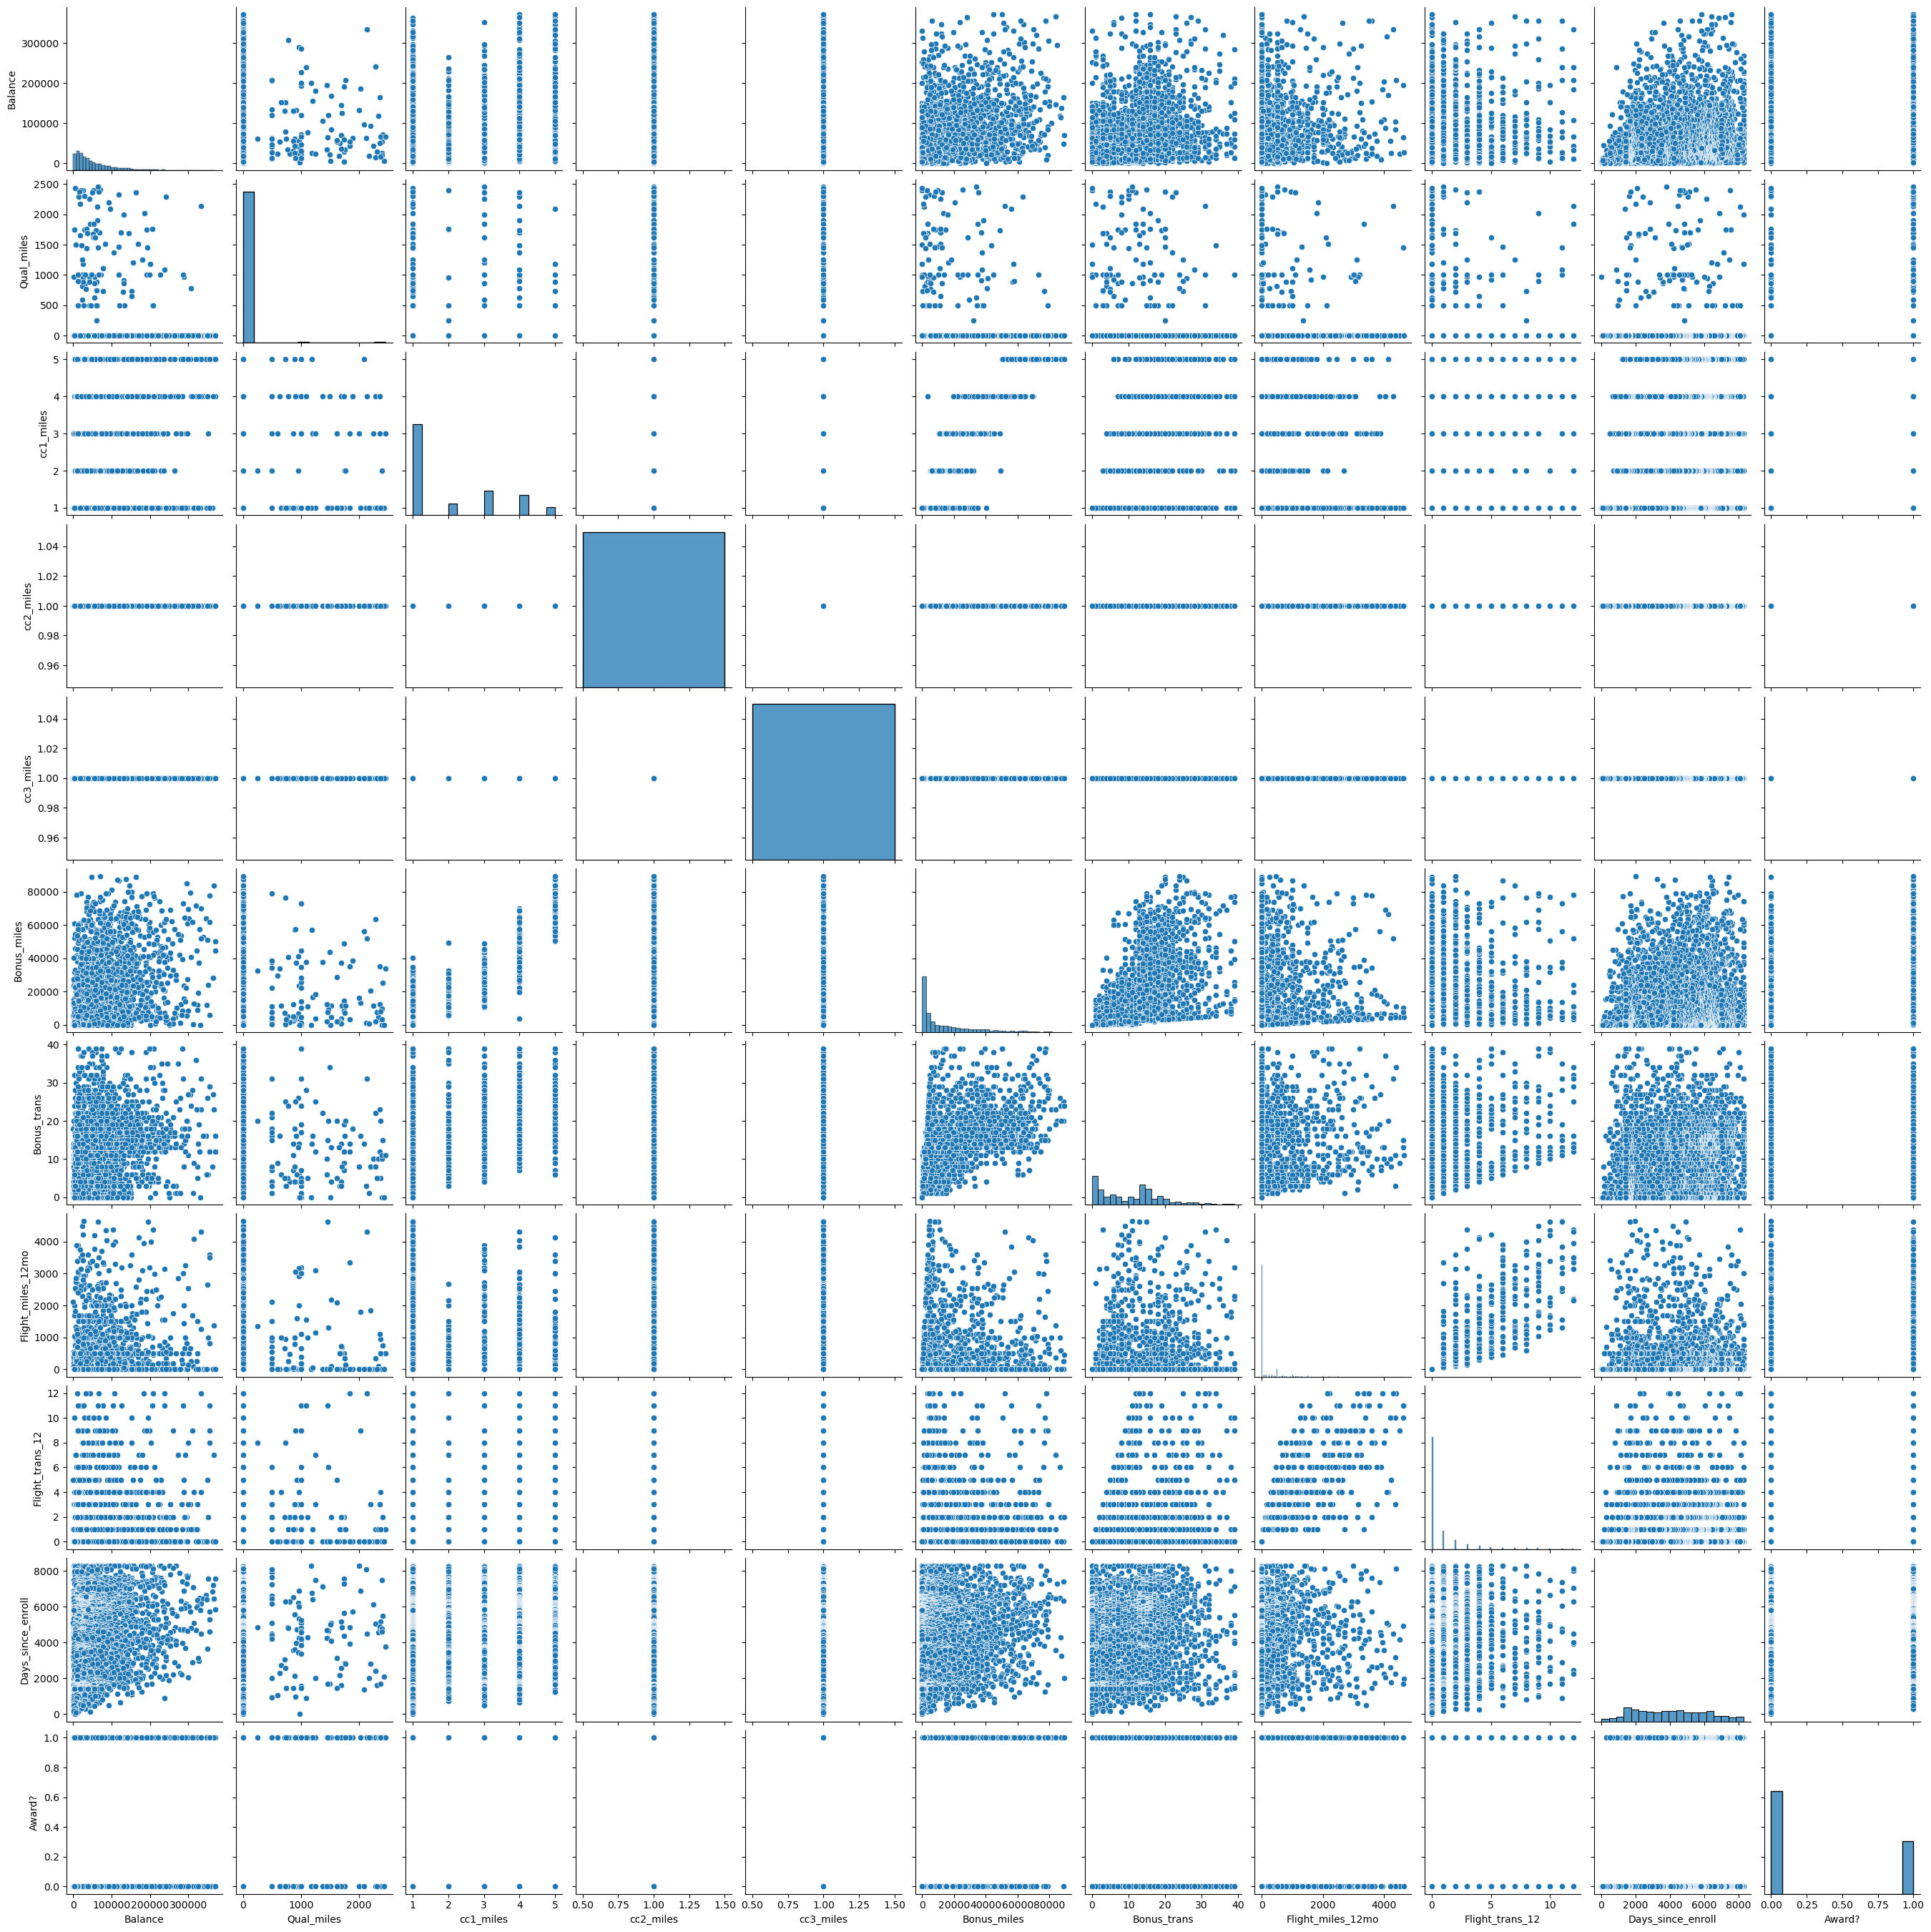

In [7]:
# plotting for feature relationships
sns.pairplot(df[numeric_cols])
plt.show()

## Implementing Clustering Algorithms:

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### K-Means Clustering

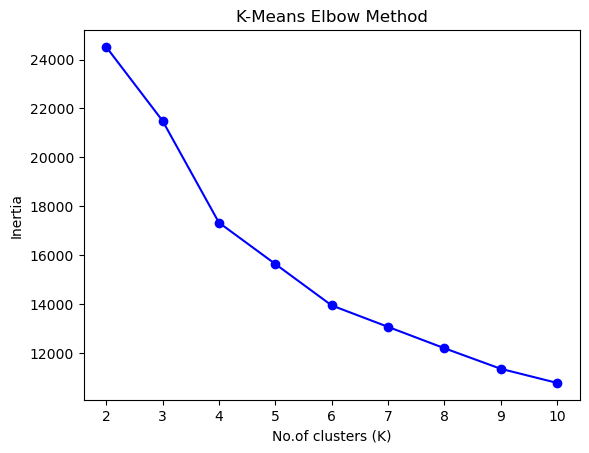

In [9]:
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 11), inertia, 'bo-')
plt.xlabel('No.of clusters (K)')
plt.ylabel('Inertia')
plt.title('K-Means Elbow Method')
plt.show()

optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)


In [10]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

### Hierarchical Clustering

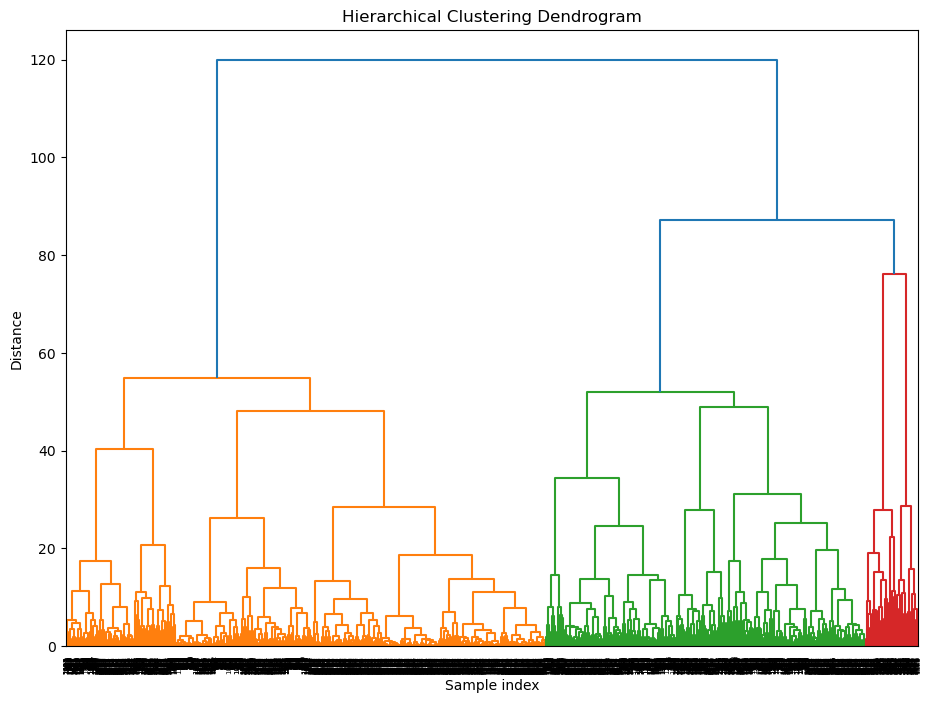

In [11]:
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(11, 8))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

hc = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
hc_labels = hc.fit_predict(X_scaled)


### DBSCAN Clustering

In [12]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.5, min_samples=8)
dbscan_labels = dbscan.fit_predict(X_scaled)

## Cluster Analysis and Interpretation

In [13]:
# Print cluster sizes and means
for i in range(optimal_k):
    print(f"K-Means Cluster {i} size: {(kmeans_labels == i).sum()}")
    print(df[numeric_cols][kmeans_labels == i].mean())

K-Means Cluster 0 size: 2134
Balance              37033.132146
Qual_miles               3.194002
cc1_miles                1.139644
cc2_miles                1.000000
cc3_miles                1.000000
Bonus_miles           3544.908154
Bonus_trans              6.006560
Flight_miles_12mo       93.823805
Flight_trans_12          0.335052
Days_since_enroll     3647.199625
Award?                   0.179475
dtype: float64
K-Means Cluster 1 size: 1188
Balance              94615.303030
Qual_miles               6.099327
cc1_miles                3.537879
cc2_miles                1.000000
cc3_miles                1.000000
Bonus_miles          32600.534512
Bonus_trans             17.328283
Flight_miles_12mo      143.514310
Flight_trans_12          0.460438
Days_since_enroll     4750.597643
Award?                   0.557239
dtype: float64
K-Means Cluster 2 size: 72
Balance              77728.083333
Qual_miles            1616.847222
cc1_miles                1.847222
cc2_miles                1.000000
c

## Cluster visualization

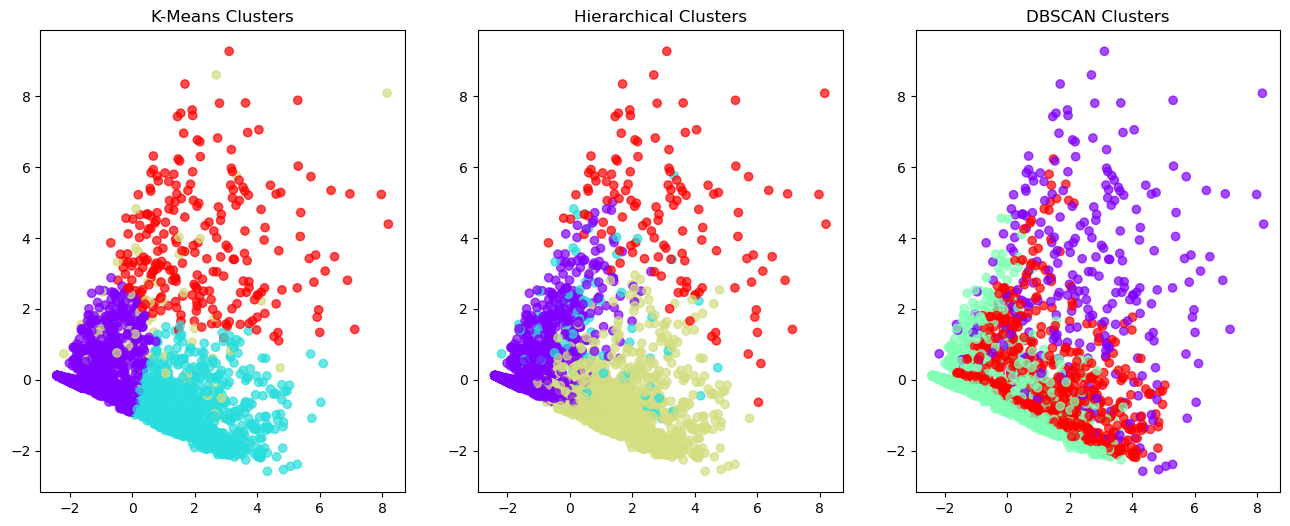

In [18]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
coords = pca.fit_transform(X_scaled)

plt.figure(figsize=(16,6))

plt.subplot(131)
plt.scatter(coords[:, 0], coords[:, 1], c=kmeans_labels, cmap='rainbow', alpha=0.7)
plt.title('K-Means Clusters')

plt.subplot(132)
plt.scatter(coords[:, 0], coords[:, 1], c=hc_labels, cmap='rainbow', alpha=0.7)
plt.title('Hierarchical Clusters')

plt.subplot(133)
plt.scatter(coords[:, 0], coords[:, 1], c=dbscan_labels, cmap='rainbow', alpha=0.7)
plt.title('DBSCAN Clusters')

plt.show()

## Clustering Quality Evaluation Using Silhouette Score for K-means and DBSCAN

In [19]:
from sklearn.metrics import silhouette_score

print("K-Means Silhouette Score:", silhouette_score(X_scaled, kmeans_labels))
print("Hierarchical Silhouette Score:", silhouette_score(X_scaled, hc_labels))

try:
    print("DBSCAN Silhouette Score:", silhouette_score(X_scaled, dbscan_labels))
except ValueError:
    print("DBSCAN may not have formed valid clusters, silhouette score not available.")


K-Means Silhouette Score: 0.3316635667716135
Hierarchical Silhouette Score: 0.29744887783615376
DBSCAN Silhouette Score: 0.24414018764963677


### Conclusion
- Different clustering algorithms offer unique strengths depending on the nature of the dataset.
- K-Means performs well for clearly separated, spherical clusters but requires the number of clusters to be specified beforehand.
- Hierarchical clustering can reveal nested data structures and does not need a predefined number of clusters.
- DBSCAN is effective at detecting clusters of various shapes and handling noise without prior knowledge of cluster counts.
- Accurate preprocessing, parameter optimization, visualization, and evaluation are crucial for reliable cluster analysis and meaningful interpretation.